
# Work

   請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現



In [1]:
import os 
import  keras

Using TensorFlow backend.


In [2]:
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [4]:
train, test = keras.datasets.cifar10.load_data()
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
"""
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [12]:
results = {}

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.8187 - acc: 0.3501 - val_loss: 1.6615 - val_acc: 0.4065
Epoch 2/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.5957 - acc: 0.4336 - val_loss: 1.5753 - val_acc: 0.4353
Epoch 3/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.5070 - acc: 0.4668 - val_loss: 1.6042 - val_acc: 0.4313
Epoch 4/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.4463 - acc: 0.4845 - val_loss: 1.4620 - val_acc: 0.4792
Epoch 5/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.4000 - acc: 0.5046 - val_loss: 1.5821 - val_acc: 0.4458
Epoch 6/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.3611 - acc: 0.5162 - val_loss: 1.4446 - val_acc: 0.4828
Epoch 7/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.3216 - acc: 0.5294 - val_loss: 1.4821 - val_acc

50000/50000 [==============================] - 2s 39us/step - loss: 1.7920 - acc: 0.3718 - val_loss: 1.7461 - val_acc: 0.3893
Epoch 3/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.7119 - acc: 0.4015 - val_loss: 1.6798 - val_acc: 0.4121
Epoch 4/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6526 - acc: 0.4223 - val_loss: 1.6426 - val_acc: 0.4245
Epoch 5/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6046 - acc: 0.4382 - val_loss: 1.5955 - val_acc: 0.4458
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5645 - acc: 0.4525 - val_loss: 1.5505 - val_acc: 0.4569
Epoch 7/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.5284 - acc: 0.4647 - val_loss: 1.5337 - val_acc: 0.4631
Epoch 8/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.4999 - acc: 0.4748 - val_loss: 1.5080 - val_acc: 0.4640
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.0322 - acc: 0.2989 - val_loss: 2.0072 - val_acc: 0.3073
Epoch 5/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.9833 - acc: 0.3151 - val_loss: 1.9643 - val_acc: 0.3184
Epoch 6/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.9449 - acc: 0.3286 - val_loss: 1.9312 - val_acc: 0.3303
Epoch 7/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.9150 - acc: 0.3376 - val_loss: 1.9052 - val_acc: 0.3382
Epoch 8/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.8907 - acc: 0.3444 - val_loss: 1.8833 - val_acc: 0.3445
Epoch 9/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.8710 - acc: 0.3505 - val_loss: 1.8658 - val_acc: 0.3507
Epoch 10/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.8533 - acc: 0.3553 - val_loss: 1.8489 - val_acc: 0.3565
Epoch 11/50
50000/50000 [===============

50000/50000 [==============================] - 2s 39us/step - loss: 2.2496 - acc: 0.1871 - val_loss: 2.2427 - val_acc: 0.1926
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.2373 - acc: 0.1978 - val_loss: 2.2310 - val_acc: 0.2010
Epoch 7/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.2257 - acc: 0.2077 - val_loss: 2.2196 - val_acc: 0.2081
Epoch 8/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.2144 - acc: 0.2138 - val_loss: 2.2084 - val_acc: 0.2170
Epoch 9/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.2034 - acc: 0.2213 - val_loss: 2.1972 - val_acc: 0.2237
Epoch 10/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.1923 - acc: 0.2281 - val_loss: 2.1862 - val_acc: 0.2293
Epoch 11/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.1815 - acc: 0.2342 - val_loss: 2.1754 - val_acc: 0.2333
Epoch 12/50
50000/50000 [=========================

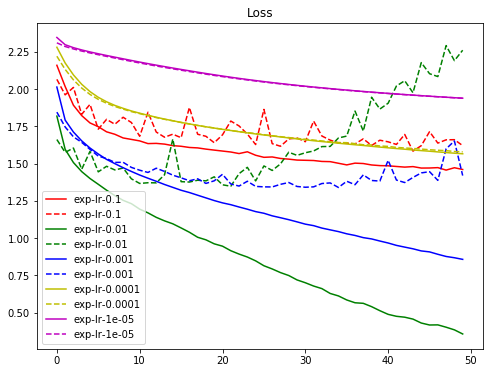

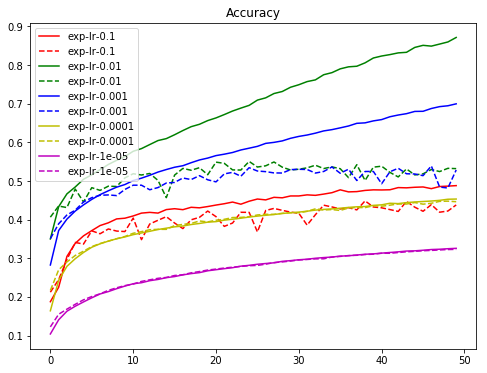

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()